In [1]:
import numpy as np
import pandas as pd
import MeCab
import re
import networkx as nx
import matplotlib.pyplot as plt

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [2]:
data1=pd.read_excel("data/se/2015_blog.xlsx")
data2=pd.read_excel("data/se/del_naver_blog_2019.xlsx")
data3=pd.read_excel("data/se/2020blogre.xlsx")

C:\Users\CPB06GameN\miniconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [3]:
d1=pd.concat([data1,data2])
d1=d1[["date","content"]]
d1

,date,content
0,2015.01.01.,한인마트는 귀찮아서 안가므로 떡볶이를 먹고싶을 때를 대비하여\n이전에 마트에서 쌀가...
1,2015.01.01.,2015. 1. 1(을미년 새해가...)\n갑자기 만들어 보고싶은게 생각 났어요!\...
2,2015.01.01.,2014년 마지막 치킨 치킨은 쌀통닭 너로 정했따!!!!!!!\n\n \n\n\n\...
3,2015.01.01.,이번 포스팅에서는 쌀벌레 없애는 방법에 대해서 알아보겠습니다\n\n\n쌀 속에 벌레...
4,2015.01.01.,"조청은 따끈하게 차로 마셔도 좋고,\n물엿 대신 요리에 넣어도 좋고,\n가래떡이나 ..."
...,...,...
8466,2019.12.01.,요리꽝손 엄마의 초기이유식 만들기 _ 쌀미음 (쌀가루 이유식)\n안녕하세요. \n하...
8467,2019.12.05.,날씨 추워진 요즘 겨울 간식으로 생각나는 그것!!! 바로 호빵이죠~~\n예전에는 단...
8468,2019.12.06.,"대만에서 한창 놀고 있는데, 연락이 오더라고요. \n11월 21일에 우리 동네 새공..."
8469,2019.12.05.,동래시장 동래부동헌 사거리 스타노래연습장 건물 간판없는 할매 떡볶이\n 인정시정 ...


In [4]:
d2=data3[["date","content"]]
d2

,date,content
0,2020.01.20.,초기이유식 2단계\n소고기미음 차례.\n나는 튼이이유식 책을보고 만들고 있는데\n(...
1,2020.01.16.,* 2020년 1월호(628호) 소식지 내용입니다\n건강한 단맛\n쌀조청\n한살림에...
2,2020.01.17.,#누룩\n#쌀\n#효모\n#쌀막걸리\n이번 막걸리 만들기에서는 쌀의 양을 2kg에서...
3,2020.01.17.,안녕하세요 해피밍입니다! 제가 며칠전 유튜브를 보다가 어떤 먹방 유튜버분이 59쌀피...
4,2020.01.02.,아기떡뻥 지후쌀과자 이것만 먹어요\n안녕하세요. 글뤽이에요.\n23개월인 저희 아기...
...,...,...
8136,2020.12.26.,피부트러블이나 장트러블이\n있는 사람들은\n글루텐에 신경쓰기 마련\n둘다 갖고 있는...
8137,2020.12.26.,집콕생활은 쌀 소비를 촉진시킵니다(하핫)\n덕분에 한달넘게 먹을 수 있는 쌀 10k...
8138,2020.12.07.,#201204\n웨딩촬영 후 잠시 들렀던 본가에 핸드폰을 두고온 똥멍청이..\n주말...
8139,2020.12.29.,코로나 확산세가 가속화 되면서\n요가 못간지 어언 1개월...\n확진자는 아니지만 ...


In [5]:
d3=pd.concat([d1,d2])
d3

,date,content
0,2015.01.01.,한인마트는 귀찮아서 안가므로 떡볶이를 먹고싶을 때를 대비하여\n이전에 마트에서 쌀가...
1,2015.01.01.,2015. 1. 1(을미년 새해가...)\n갑자기 만들어 보고싶은게 생각 났어요!\...
2,2015.01.01.,2014년 마지막 치킨 치킨은 쌀통닭 너로 정했따!!!!!!!\n\n \n\n\n\...
3,2015.01.01.,이번 포스팅에서는 쌀벌레 없애는 방법에 대해서 알아보겠습니다\n\n\n쌀 속에 벌레...
4,2015.01.01.,"조청은 따끈하게 차로 마셔도 좋고,\n물엿 대신 요리에 넣어도 좋고,\n가래떡이나 ..."
...,...,...
8136,2020.12.26.,피부트러블이나 장트러블이\n있는 사람들은\n글루텐에 신경쓰기 마련\n둘다 갖고 있는...
8137,2020.12.26.,집콕생활은 쌀 소비를 촉진시킵니다(하핫)\n덕분에 한달넘게 먹을 수 있는 쌀 10k...
8138,2020.12.07.,#201204\n웨딩촬영 후 잠시 들렀던 본가에 핸드폰을 두고온 똥멍청이..\n주말...
8139,2020.12.29.,코로나 확산세가 가속화 되면서\n요가 못간지 어언 1개월...\n확진자는 아니지만 ...


In [6]:
data=d3.dropna(axis=0, how='any', subset = ["content"]) 
data=data.reset_index()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23312 entries, 0 to 23311
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    23312 non-null  int64 
 1   date     23311 non-null  object
 2   content  23312 non-null  object
dtypes: int64(1), object(2)
memory usage: 546.5+ KB


In [7]:
from collections import Counter
import warnings
warnings.filterwarnings(action='ignore')

In [8]:
data2 = data.copy()

In [9]:
for i in range(len(data2)):
    data2["content"][i]=str(data2["content"][i]).replace('네요','네요||-||').replace('하죠','하죠||-||').replace('데요','데요||-||').replace('이네요','이네요||-||').replace('네요.','네요||-||').replace('되죠','되죠||-||').replace('대요','대요||-||').replace('이요','이요||-||').replace('돼요.','돼요||-||').replace('되요','되요||-||').replace('다닙니다','다닙니다||-||').replace('입니다','입니다||-||').replace('입니다.','입니다||-||').replace('니다','니다||-||').replace('중입니다','중입니다||-||').replace('입니다','입니다||-||').replace('나요.','나요||-||').replace('어요','어요||-||').replace('까요','까요||-||').replace('에요','에요||-||').replace('이에요','이에요||-||').replace('봐요','봐요||-||').replace('아요.','아요||-||').replace('해요','해요||-||').replace('려요','려요||-||').replace('구요','구요||-||').replace('고요','고요||-||').replace('죠','죠||-||').replace(':)','').replace('더라','더라||-||').replace('게요','게요||-||').replace('께요','께요||-||').replace('세요','세요||-||').replace('든요','든요||-||').replace('예요','예요||-||').replace('서요','서요||-||').replace('않았다','않았다||-||').replace('었다','었다||-||').replace('있다','있다||-||').replace('이다','이다||-||').replace('싶다','싶다||-||').replace('않다','않다||-||').replace('되었다','되었다||-||').replace('아니다','아니다||-||').replace('하자','하자||-||').replace('는다','는다||-||').replace('했다','했다||-||').replace('한다','한다||-||').replace('혔다','혔다||-||').replace('난다','난다||-||')

In [10]:
for i in range(len(data2)):
    data2["content"][i]=str(data2["content"][i]).replace('.','').replace('?','').replace('~','').replace('!','').replace('^','').replace('#','').replace('★','').replace('ㅋ','').replace('ㅜ','').replace('ㅠ','').replace('ㅎ','').replace('ㅏ','').replace('ㅡ','')

In [11]:
data2

,index,date,content
0,0,2015.01.01.,한인마트는 귀찮아서 안가므로 떡볶이를 먹고싶을 때를 대비하여\n이전에 마트에서 쌀가...
1,1,2015.01.01.,2015 1 1(을미년 새해가)\n갑자기 만들어 보고싶은게 생각 났어요||-||\n...
2,2,2015.01.01.,2014년 마지막 치킨 치킨은 쌀통닭 너로 정했따\n\n \n\n\n\n엄청나배달 ...
3,3,2015.01.01.,이번 포스팅에서는 쌀벌레 없애는 방법에 대해서 알아보겠습니다||-||\n\n\n쌀 ...
4,4,2015.01.01.,"조청은 따끈하게 차로 마셔도 좋고,\n물엿 대신 요리에 넣어도 좋고,\n가래떡이나 ..."
...,...,...,...
23307,8136,2020.12.26.,피부트러블이나 장트러블이\n있는 사람들은\n글루텐에 신경쓰기 마련\n둘다 갖고 있는...
23308,8137,2020.12.26.,집콕생활은 쌀 소비를 촉진시킵니다||-||(하핫)\n덕분에 한달넘게 먹을 수 있는 ...
23309,8138,2020.12.07.,201204\n웨딩촬영 후 잠시 들렀던 본가에 핸드폰을 두고온 똥멍청이\n주말내내 ...
23310,8139,2020.12.29.,코로나 확산세가 가속화 되면서\n요가 못간지 어언 1개월\n확진자는 아니지만 확찐자...


In [12]:
conlist=[]
for i in range(len(data2)):

    a=[]
    a.append(data2["content"][i].split("||-||"))
    
    d=pd.DataFrame(a).T
    d=d[d[0]!=""].reset_index()
    d=d[d[0]!="구요"].reset_index()
    conca1=d[d[0].str.contains("빵|케이크|케익|쿠키|머핀|카스테라|식빵|다쿠아즈|마카롱|버터|초코|크림|오븐|생크림|앙금|반죽|설탕|박력분",na=False)]
    conidex=conca1.index
    list(conidex)


    for i in list(conidex):
        conlist.append(str(d[0][i]))
        #try:
            #conlist.append(+str(d[0][i]))
        #except:
            #pass

In [13]:
aaaa=pd.DataFrame(conlist)
aaaa

,0
0,\n\n*방법은 쌀가루+소금+설탕 섞고 뜨거운물 조금씩 넣어서\n물조절하고 전자렌지...
1,"\n그이름 "" 쌀 만두국""\n\n \n\n쌀가루로 반죽을 했어요"
2,"\n그런데 밀가루 같이 부드럽게 되는게 아니공,,,\n반죽이 자꾸 손에 달라 붙어요"
3,\n그런데 예쁜 반죽\n일단 성공 했지요(냉장고에서 휴지)\n\n\n\n\n 호박을...
4,\n\n\n\n대한민국 생태수도 순천에서 직접 길러낸 질 좋은 농산물만을 엄선해 정...
...,...
45549,\n오리지널찐빵에 없는 보리로 쌀찐빵을 주문하고 싶었는데\n이미 많이 팔린건지 없어...
45550,\n집가서 아빠랑 같이 먹어야지_\n사진찍으려고 준비하는 사이에 아빠가 홀랑 쑥찐빵...
45551,는 말이 있어서 그대로 해봄\n(사진없음)\n무튼\n찬물+식초에 담궈 뒀다가 찬물에...
45552,"고 깝쳐서 설탕,김치빼고 매실액만 넣음\n\n근데 진짜 냄새1도 안나고 쫠깃 까지는..."


In [14]:
for i in range(len(aaaa)):
    aaaa[0][i]=aaaa[0][i].lstrip()
    aaaa[0][i]=aaaa[0][i].rstrip()

In [15]:
qw=aaaa.drop_duplicates([0],keep = 'first')
qw.to_excel("blog_bk.xlsx")
qw

,0
0,*방법은 쌀가루+소금+설탕 섞고 뜨거운물 조금씩 넣어서\n물조절하고 전자렌지로 찜\...
1,"그이름 "" 쌀 만두국""\n\n \n\n쌀가루로 반죽을 했어요"
2,"그런데 밀가루 같이 부드럽게 되는게 아니공,,,\n반죽이 자꾸 손에 달라 붙어요"
3,그런데 예쁜 반죽\n일단 성공 했지요(냉장고에서 휴지)\n\n\n\n\n 호박을 살...
4,대한민국 생태수도 순천에서 직접 길러낸 질 좋은 농산물만을 엄선해 정성과 사랑으로 ...
...,...
45549,오리지널찐빵에 없는 보리로 쌀찐빵을 주문하고 싶었는데\n이미 많이 팔린건지 없어서 ...
45550,집가서 아빠랑 같이 먹어야지_\n사진찍으려고 준비하는 사이에 아빠가 홀랑 쑥찐빵을 ...
45551,는 말이 있어서 그대로 해봄\n(사진없음)\n무튼\n찬물+식초에 담궈 뒀다가 찬물에...
45552,"고 깝쳐서 설탕,김치빼고 매실액만 넣음\n\n근데 진짜 냄새1도 안나고 쫠깃 까지는..."


In [16]:
data = pd.read_excel('blog_bk.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44785 entries, 0 to 44784
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44785 non-null  int64 
 1   content     44772 non-null  object
dtypes: int64(1), object(1)
memory usage: 699.9+ KB


In [17]:
data=data.dropna(axis=0, how='any', subset = ["content"]) 
data=data.reset_index()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44772 entries, 0 to 44771
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       44772 non-null  int64 
 1   Unnamed: 0  44772 non-null  int64 
 2   content     44772 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.0+ MB


In [18]:
del data['Unnamed: 0']

In [19]:
stopwords = ['천원', '꼭걸', '먹이', '그날', '삭제', '키', '정말', '입', '만', '포스팅', '약간', '정보', '말', '어제', '옵션', '아래', '분', '처음', '개', '년', '혹시', '사람', '시', '추천', '쌀', '애', '저희', '로', '이용', '판매', '체', '가요', '사', '번호', '이제', '나', '을', '경우', '오늘', '아주', '진짜', '모두', '자동', '날', '시골', '는', '손', '생각', '질문', '연락', '살', '역시', '센치', '구입', '끼', '용', '사실', '것', '배', '위', '요즘', '다른', '지금', '불', '시작', '다시', '우리', '은', '사랑', '거', '킹', '제품', '등', '조금', '내', '이후', '앞', '줄', '단계', '이번', '직접', '이', '재생', '좀', '미니', '봉', '가', '맘', '월', '듯', '중', '저', '신분', '첫', '미리', '더', '사용', '여기', '농사', '요', '한번', '작성', '게시', '주문', '어디', '농', '산', '개월', '거의', '안', '를', '완전', '제', '및', '실', '글', '원', '다음', '위해', '곳', '그냥', '구매', '초기', '준비', '도', '계속', '때', '유통', '살짝', '먹기', '후', '나눔', '때모두', '댓글', '알', '규정', '정도', '점', '스푼', '얼마', '화질', '일', '못', '마을', '만원', '아시', '하루', '걸', '전', '바로', '수', '또', '중기', '번', '먼저', '달', '기', '건', '반', '구', '숟가락', '사진', '선택', '사서', '호', '완성', '가지', '뭐', '가장', '내일', '공지', '때문', '방법', '보고', '이상', '끝', '하나', '해', '사항', '한국', '그', '습', '꼭', '왜', '떡뻥']

In [20]:
def getNVM_lemma(x):
    tokenizer = MeCab.Tagger()
    parsed = tokenizer.parse(x)
    #print(parsed)
    word_tag = [w for w in parsed.split("\n")] 
    pos = []
    tags = ["NNG", "NNP","VV","VA","VCP",'VCN','XR']
   
    for word_ in word_tag[:-2]:
        word = word_.split('\t') #['아버지', 'NNG,*,F,아버지,*,*,*,*']
        tag = word[1].split(",")  #['EC', '*', 'F', '는다', '*', '*', '*', '*']
        if('+' in tag[0]): #단어가 여러 형태소로 구성된 경우
            if ('VV' in tag[0] or 'VA' in tag[0] or 'VX' in tag[0]):
                t = tag[-1].split('/')[0]
                if t not in stopwords:
                    pos.append(t)
        elif ((tag[0] in tags) and (word[0] not in stopwords)):
            pos.append(word[0])
    return pos

In [21]:
data['words'] = data['content'].apply(lambda x: getNVM_lemma(x))
print(data.shape)
data.head()

(44772, 3)


,index,content,words
0,0,*방법은 쌀가루+소금+설탕 섞고 뜨거운물 조금씩 넣어서\n물조절하고 전자렌지로 찜\...,"[쌀가루, 소금, 설탕, 섞, 뜨겁, 물, 넣, 물, 조절, 전자, 렌지, 찜, 떡..."
1,1,"그이름 "" 쌀 만두국""\n\n \n\n쌀가루로 반죽을 했어요","[이름, 두국, 쌀가루, 반죽, 하]"
2,2,"그런데 밀가루 같이 부드럽게 되는게 아니공,,,\n반죽이 자꾸 손에 달라 붙어요","[밀가루, 부드럽, 되, 아니, 반죽, 다르, 붙]"
3,3,그런데 예쁜 반죽\n일단 성공 했지요(냉장고에서 휴지)\n\n\n\n\n 호박을 살...,"[예쁘, 반죽, 성공, 냉장고, 휴지, 호박, 절이, 숙주나물, 테, 치, 베보, ..."
4,4,대한민국 생태수도 순천에서 직접 길러낸 질 좋은 농산물만을 엄선해 정성과 사랑으로 ...,"[대한민국, 생태, 수도, 순천, 기르, 질, 좋, 농산물, 엄선, 정성, 깊, 맛..."


In [22]:
# 트랜잭션 데이터를 추출합니다.
transactions = data['words'].tolist()
transactions = [transaction for transaction in transactions if transaction] # 공백 문자열을 방지합니다.

In [23]:
ex_list=[]
for i in transactions:
    for j in i:
        ex_list.append(j)

In [26]:
ex_list

['생태',
 '최신',
 '보금자리',
 '무당벌레',
 '지점장',
 '쪼물',
 '한모',
 '정종',
 '버물',
 '방바닥',
 '호응',
 '편평',
 '기속',
 '가당',
 '제야',
 '델리',
 '엔터',
 '델리',
 '델리',
 '카슈',
 '엔터',
 '한양',
 '델리',
 '카슈',
 '엔터',
 '한양',
 '댕댕이',
 '미금',
 '리츠',
 '물개',
 '다투',
 '완정',
 '아지매',
 '소영',
 '프렛',
 '과방',
 '친밀',
 '삐',
 '부산갈매기',
 '페어',
 '구당',
 '군고구마',
 '중구',
 '우주복',
 '열흘',
 '가입자',
 '저녁밥',
 '삐',
 '쓰디쓰',
 '공용',
 '밧',
 '개취',
 '일렬',
 '조앙',
 '푸치',
 '푸치',
 '레오나',
 '푸치시',
 '푸치',
 '빤짝이',
 '돌잡이',
 '돌고래',
 '관내',
 '체온계',
 '인보',
 '도모로',
 '호응',
 '수혜자',
 '체온계',
 '체온계',
 '대학로',
 '중아',
 '띠끄',
 '샤루',
 '장작불',
 '양구',
 '듯하',
 '등분',
 '돌전',
 '베가스',
 '베가스',
 '에피소드',
 '질퍽',
 '당구',
 '포켓볼',
 '수험자',
 '배료',
 '정확도',
 '숙련도',
 '개인위생',
 '정접',
 '총각',
 '카페베네',
 '임실',
 '지루',
 '개미',
 '딜리셔스',
 '봉사',
 '올라타',
 '요원',
 '동지',
 '대다수',
 '국밥',
 '소불',
 '육질',
 '엄홍길',
 '국밥',
 '포진',
 '삼겹살',
 '금값',
 '한인',
 '남부럽',
 '시금치나물',
 '시금치나물',
 '집기',
 '호평',
 '호평동',
 '호평동',
 '호야',
 '축생',
 '금오동',
 '말아먹',
 '쪼꼬마',
 '기별',
 '권삼',
 '기행',
 '일손',
 '요르단',
 '암만',
 '둥글넓적',
 '이동문',
 '타노',
 '요르단',
 '시리아',


In [27]:
count = Counter(ex_list)
count

Counter({'생태': 3,
         '최신': 2,
         '보금자리': 1,
         '무당벌레': 1,
         '지점장': 1,
         '쪼물': 1,
         '한모': 1,
         '정종': 2,
         '버물': 3,
         '방바닥': 2,
         '호응': 3,
         '편평': 2,
         '기속': 1,
         '가당': 1,
         '제야': 1,
         '델리': 15,
         '엔터': 3,
         '카슈': 4,
         '한양': 2,
         '댕댕이': 4,
         '미금': 4,
         '리츠': 1,
         '물개': 2,
         '다투': 2,
         '완정': 1,
         '아지매': 6,
         '소영': 1,
         '프렛': 1,
         '과방': 1,
         '친밀': 1,
         '삐': 7,
         '부산갈매기': 1,
         '페어': 2,
         '구당': 1,
         '군고구마': 19,
         '중구': 12,
         '우주복': 1,
         '열흘': 1,
         '가입자': 1,
         '저녁밥': 3,
         '쓰디쓰': 2,
         '공용': 4,
         '밧': 4,
         '개취': 8,
         '일렬': 5,
         '조앙': 1,
         '푸치': 3,
         '레오나': 1,
         '푸치시': 1,
         '빤짝이': 1,
         '돌잡이': 2,
         '돌고래': 2,
         '관내': 4,
         '체온계': 3,
    

In [28]:
words = dict(count.most_common())
words

{'하': 12899,
 '먹': 9944,
 '빵': 9813,
 '케이크': 9740,
 '만들': 9282,
 '있': 6526,
 '좋': 5887,
 '맛': 5028,
 '넣': 4918,
 '쿠키': 4601,
 '맛있': 4300,
 '보': 4215,
 '반죽': 4147,
 '되': 4053,
 '쌀가루': 3772,
 '설탕': 3551,
 '같': 3503,
 '식빵': 3416,
 '떡': 3218,
 '주': 3077,
 '굽': 2818,
 '초코': 2818,
 '버터': 2744,
 '크림': 2465,
 '없': 2423,
 '밀가루': 2265,
 '들': 2149,
 '오븐': 2030,
 '들어가': 2014,
 '오': 1962,
 '베이': 1936,
 '디저트': 1912,
 '간식': 1880,
 '건강': 1819,
 '재료': 1805,
 '크': 1767,
 '앙금': 1740,
 '집': 1695,
 '우유': 1691,
 '카페': 1672,
 '클래스': 1653,
 '찐빵': 1643,
 '아이': 1597,
 '나오': 1432,
 '수업': 1425,
 '섞': 1420,
 '케익': 1401,
 '많': 1373,
 '치즈': 1357,
 '가루': 1343,
 '부드럽': 1341,
 '물': 1307,
 '아이스크림': 1307,
 '호빵': 1304,
 '카스테라': 1296,
 '다쿠아즈': 1286,
 '선물': 1259,
 '머핀': 1250,
 '과자': 1215,
 '만드': 1180,
 '수제': 1180,
 '딸기': 1168,
 '소금': 1147,
 '지': 1136,
 '빵집': 1119,
 '속': 1110,
 '시간': 1099,
 '생크림': 1086,
 '쌀빵': 1084,
 '식감': 1076,
 '보이': 1068,
 '바게트': 1063,
 '발효': 1042,
 '계란': 1002,
 '베이킹': 993,
 '아니': 972,
 '플라워': 969,
 '고소':

In [29]:
df = pd.DataFrame(list(words.items()), columns=['word', 'cnt'])
df.head()

,word,cnt
0,하,12899
1,먹,9944
2,빵,9813
3,케이크,9740
4,만들,9282


In [30]:
from apyori import apriori
# 연관 분석을 수행합니다.
results = list(apriori(transactions,
    min_support=0.06,
    min_confidence=0.05,
    min_lift=1.0,
    max_length=2))

In [37]:
# 데이터 프레임 형태로 정리합니다.
columns = ['source', 'target', 'support']
network_df = pd.DataFrame(columns=columns)

# 규칙의 조건절을 source, 결과절을 target, 지지도를 support 라는 데이터 프레임의 피처로 변환합니다.
for result in results:
    if len(result.items) == 2:
        items = [x for x in result.items]
        row = [items[0], items[1], result.support]
        series = pd.Series(row, index=network_df.columns)
        network_df = network_df.append(series, ignore_index=True)

print(network_df.shape)
network_df

(6, 3)


,source,target,support
0,하,만들,0.070939
1,먹,빵,0.065422
2,하,먹,0.084117
3,하,빵,0.068236
4,하,있,0.060441
5,하,좋,0.074513


In [32]:
node_df = pd.DataFrame(count.items(), columns=['node', 'nodesize'])
node_df.head()

,node,nodesize
0,생태,3
1,최신,2
2,보금자리,1
3,무당벌레,1
4,지점장,1


In [35]:
node_df = node_df[node_df['nodesize'] >= 100] # 시각화의 편의를 위해 ‘nodesize’ 40 미만은 제거합니다.
node_df.head()

,node,nodesize
888,크림소스,125
932,파스타,273
1055,끓,102
1463,올리고당,101
1637,드라이,111


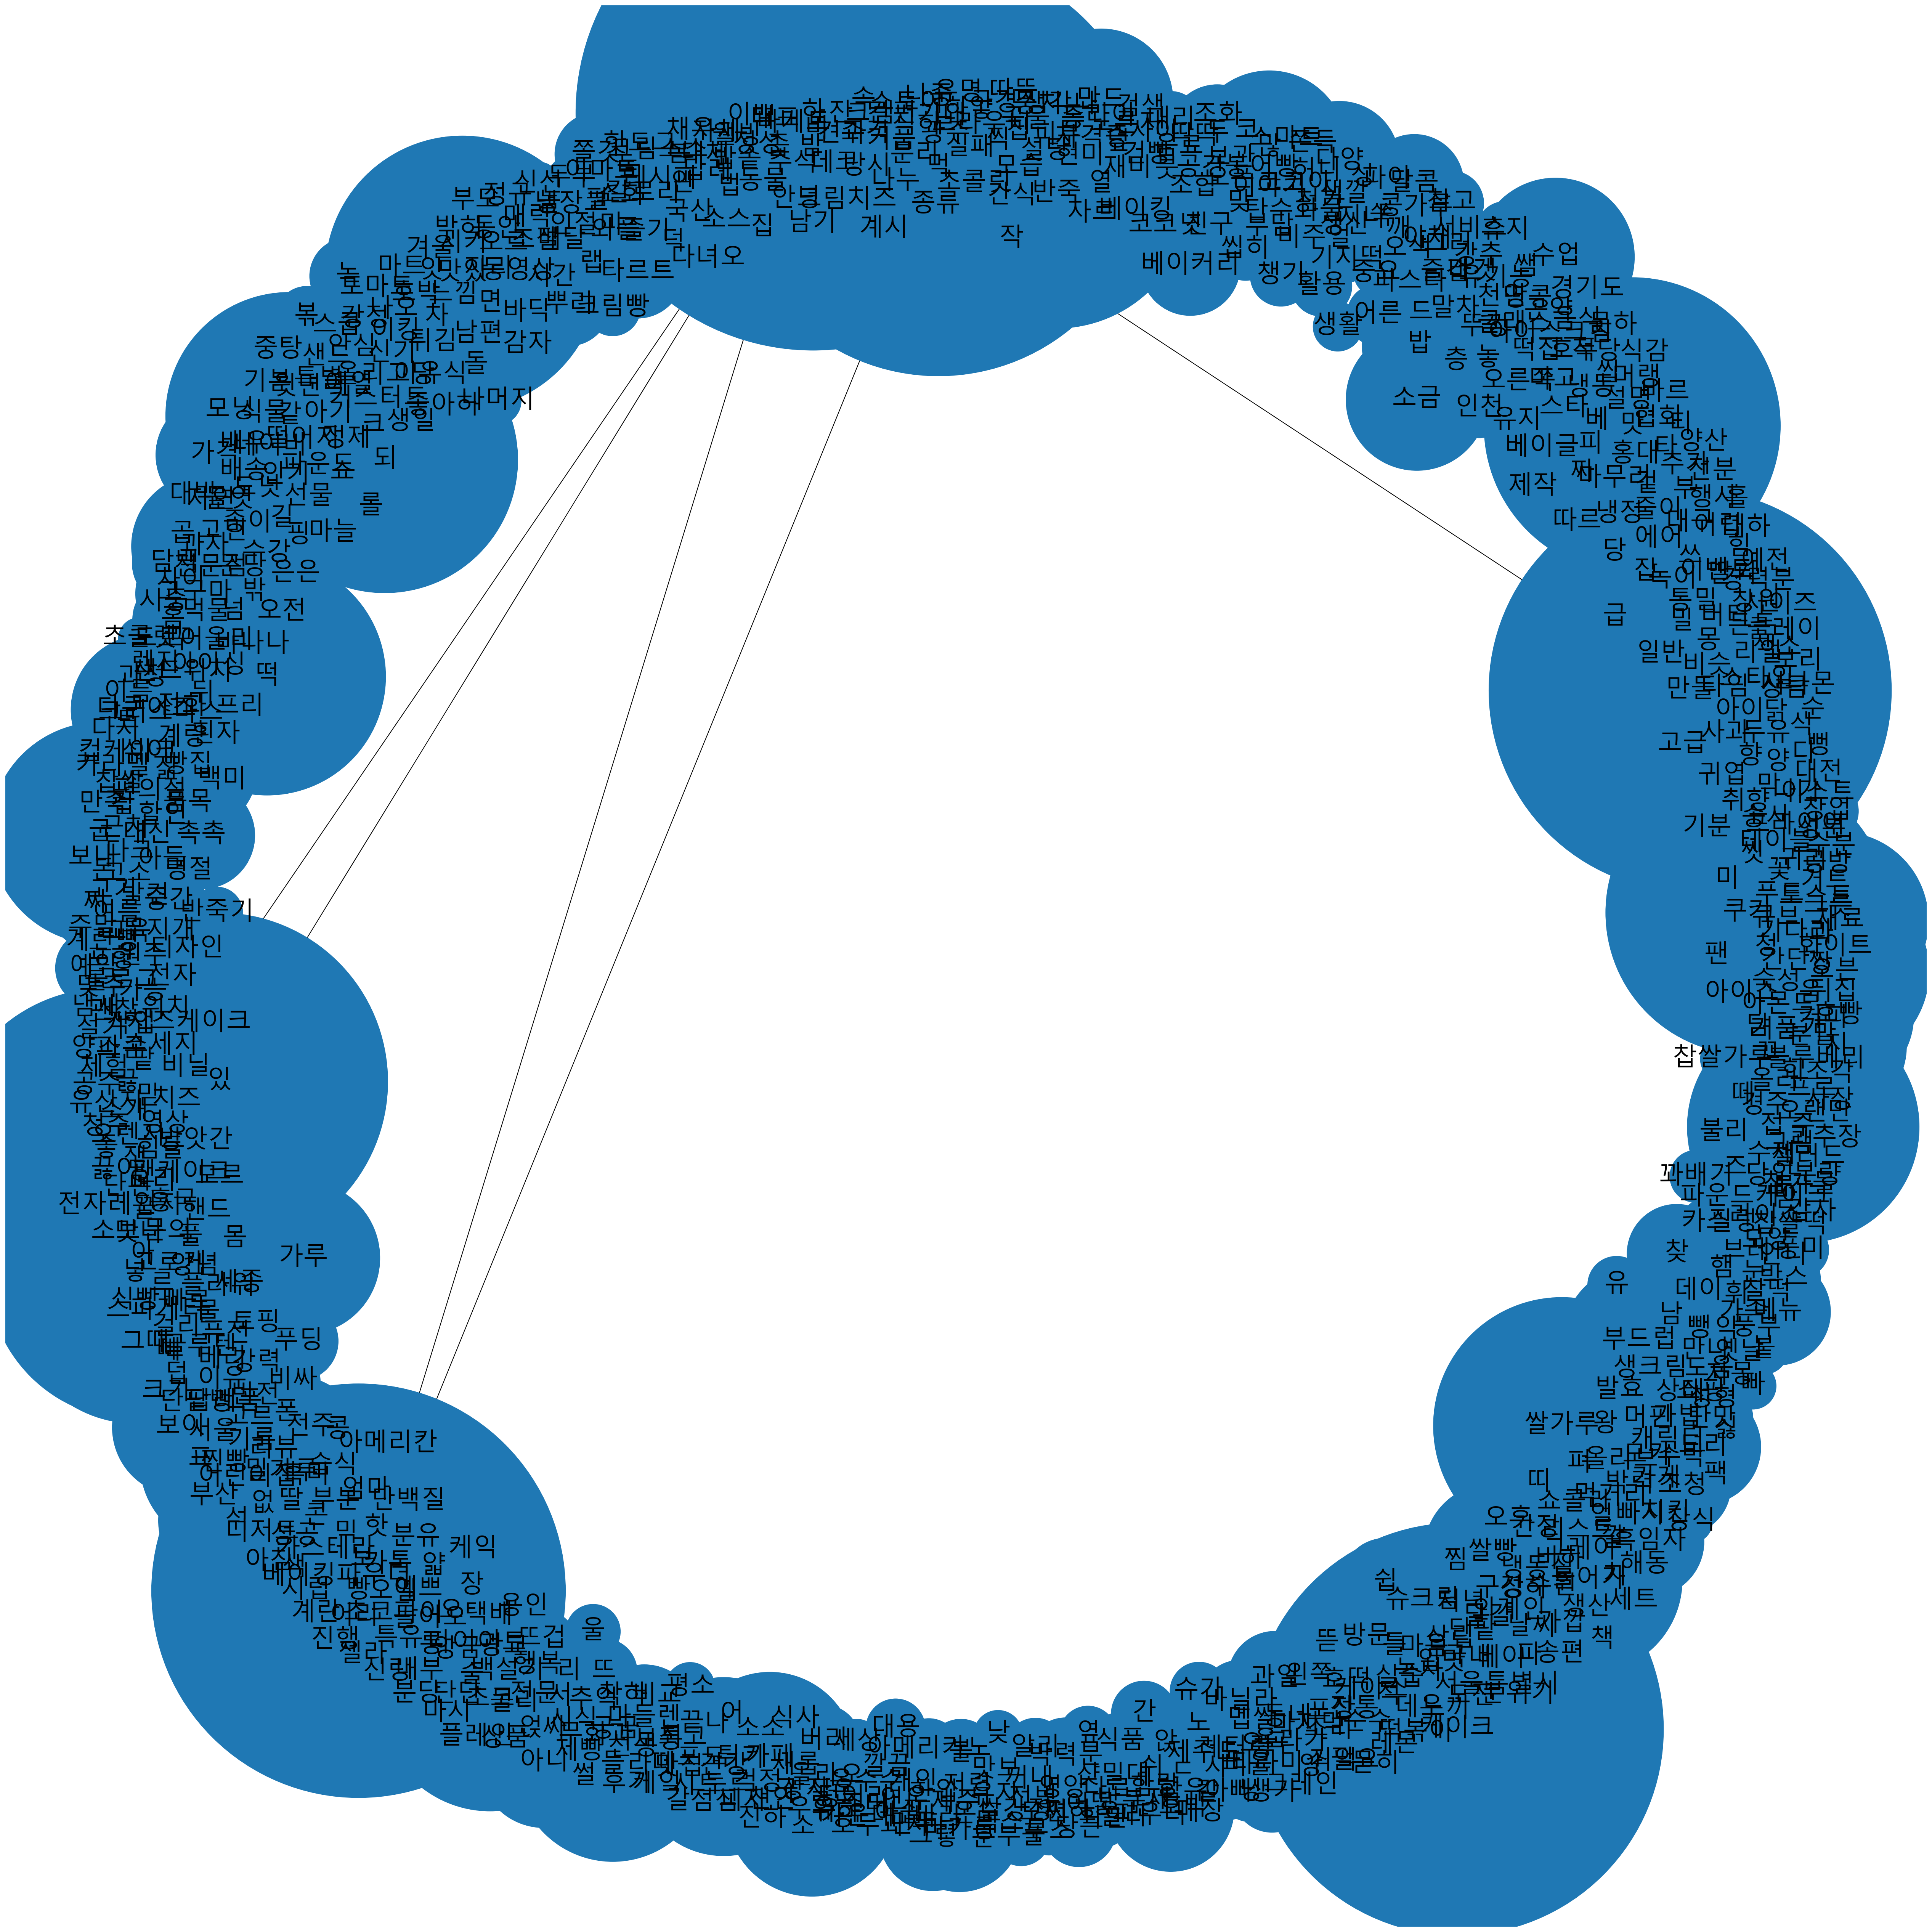

In [36]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.figure(figsize=(35,35))

# networkx 그래프 객체를 생성합니다.
G = nx.Graph()

# node_df의 키워드 빈도수를 데이터로 하여, 네트워크 그래프의 ‘노드’ 역할을 하는 원을 생성합니다.
for index, row in node_df.iterrows():
    G.add_node(row['node'], nodesize=row['nodesize'])

# network_df의 연관 분석 데이터를 기반으로, 네트워크 그래프의 ‘관계’ 역할을 하는 선을 생성합니다.
for index, row in network_df.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['support'])])


# for node in G:
#     print(G.nodes[node])


# 그래프 디자인과 관련된 파라미터를 설정합니다.
pos = nx.spring_layout(G, k=0.6, iterations=50)
sizes = [G.nodes[node]['nodesize']*30 for node in G]
nx.draw(G, pos=pos, node_size=sizes)

font_path = "data/Pretendard-Black.otf"
fname = fm.FontProperties(fname=font_path).get_name()

nx.draw_networkx_labels(G, pos=pos, font_family="Malgun Gothic", font_size=33)



# # 그래프를 출력합니다.
ax = plt.gca()
plt.show()